# K-means Clustering


In [20]:
# used for manipulating directory paths
import os
import math
# Scientific and vector computation for python
import numpy as np
# Plotting library
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl

# Optimization module in scipy
from scipy import optimize

# will be used to load MATLAB mat datafile format
from scipy.io import loadmat
%matplotlib inline

The K-means algorithm is as follows:

centroids = kMeansInitCentroids(X, K)
for i in range(iterations):
    # Cluster assignment step: Assign each data point to the
    # closest centroid. idx[i] corresponds to cˆ(i), the index
    # of the centroid assigned to example i
    idx = findClosestCentroids(X, centroids)

    # Move centroid step: Compute means based on centroid
    # assignments
    centroids = computeMeans(X, idx, K)

In [21]:
def findClosestCentroids(X, centroids):
    """
    Computes the centroid memberships for every example.
    
    Parameters
    ----------
    X : array_like
        The dataset of size (m, n) where each row is a single example. 
        That is, we have m examples each of n dimensions.
        
    centroids : array_like
        The k-means centroids of size (K, n). K is the number
        of clusters, and n is the the data dimension.
    
    Returns
    -------
    idx : array_like
        A vector of size (m, ) which holds the centroids assignment for each
        example (row) in the dataset X.
    """
    # Set K
    K = centroids.shape[0]
    m = X.shape[0]
    idx = np.zeros(X.shape[0], dtype=int)
    for i in range(m):
        min_dist = math.inf
        for j in range(K):
            dist = (X[i,:] - centroids[j,:]) ** 2
            dist = sum(dist)
            if dist < min_dist:
                min_dist = dist
                idx[i] = j
    return idx

In [22]:
def computeCentroids(X, idx, K):
    """
    Returns the new centroids by computing the means of the data points
    assigned to each centroid.
    
    Parameters
    ----------
    X : array_like
        The datset where each row is a single data point. That is, it 
        is a matrix of size (m, n) where there are m datapoints each
        having n dimensions. 
    
    idx : array_like 
        A vector (size m) of centroid assignments (i.e. each entry in range [0 ... K-1])
        for each example.
    
    K : int
        Number of clusters
    
    Returns
    -------
    centroids : array_like
        A matrix of size (K, n) where each row is the mean of the data 
        points assigned to it.
    """
    m, n = X.shape
    centroids = np.zeros((K, n))
    number = np.zeros((K,1))
    for i in range(m):
        centroids[idx[i]] += X[i,:]
    for i in range(K):
        number[i] = sum(idx == i)
        
    centroids /= number
    
    return centroids

In [23]:
def runkMeans(X, centroids, findClosestCentroids, computeCentroids,
              max_iters=10, plot_progress=False):
    """
    Runs the K-means algorithm.

    """
    K = centroids.shape[0]
    centroid_history = []

    for i in range(max_iters):
        idx = findClosestCentroids(X, centroids)
        if plot_progress:
            centroid_history.append(centroids)
        centroids = computeCentroids(X, idx, K)
    
    if plot_progress:
        fig = pyplot.figure()
        pyplot.scatter(X[:,0],X[:,1],c = 'k')
        for i in range(max_iters - 1):
            pyplot.plot(centroid_history[i][0][0],centroid_history[i][0][1],'r*',ms = 10)
            pyplot.plot(centroid_history[i][1][0],centroid_history[i][1][1],'m*',ms = 10)
            pyplot.plot(centroid_history[i][2][0],centroid_history[i][2][1],'g*',ms = 10)
            
    
        pyplot.plot(centroids[0][0],centroids[0][1],'yo',ms = 12)
        pyplot.plot(centroids[1][0],centroids[1][1],'yo',ms = 12)
        pyplot.plot(centroids[2][0],centroids[2][1],'yo',ms = 12)
    print("final_centroids = ",centroids)
    return centroids, idx

In [24]:
def kMeansInitCentroids(X, K):
    """
    This function initializes K centroids that are to be used in K-means on the dataset x.
    """
    m, n = X.shape
    centroids = np.zeros((K, n))
    # Randomly reorder the indices of examples
    randidx = np.random.permutation(X.shape[0])
    # Take the first K examples as centroids
    centroids = X[randidx[:K], :]
    return centroids

Init_centroids =  [[3.1189017  0.69438336]
 [3.43493543 5.34080741]
 [7.21684033 2.72896575]]
final_centroids =  [[3.04367119 1.01541041]
 [1.95399466 5.02557006]
 [6.03366736 3.00052511]]


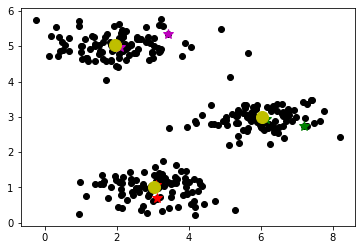

In [25]:
#Load an example dataset
data = loadmat(os.path.join('Data', 'ex7data2.mat'))
X1 = data['X']
#print(data)
initial_centroids = kMeansInitCentroids(X1,3)
print("Init_centroids = ",initial_centroids)
# Run K-Means algorithm. The 'true' at the end tells our function to plot
# the progress of K-Means
centroids, idx = runkMeans(X1, initial_centroids,findClosestCentroids, computeCentroids,10, True)

Black dots are the data. Three different colours shows the path of centriods. Yellow dots are the final centroids

# Image compression with K-means

final_centroids =  [[0.00377031 0.00378927 0.00350824]
 [0.00152386 0.00179225 0.00248135]
 [0.0037952  0.00352165 0.00255375]
 [0.00213161 0.0015955  0.00094223]
 [0.00235822 0.00203383 0.00178263]
 [0.00286866 0.00258156 0.0023597 ]
 [0.00302389 0.00214906 0.00099126]
 [0.00387153 0.00369214 0.00307135]
 [0.00330076 0.00264998 0.0016081 ]
 [0.00346597 0.00302729 0.00292651]
 [0.00049535 0.00052714 0.00049153]
 [0.00359464 0.00302795 0.00201454]
 [0.00225867 0.0028453  0.00340118]
 [0.00085025 0.0008011  0.00076951]
 [0.00142174 0.00119697 0.00109074]
 [0.00029979 0.00032531 0.00028464]]


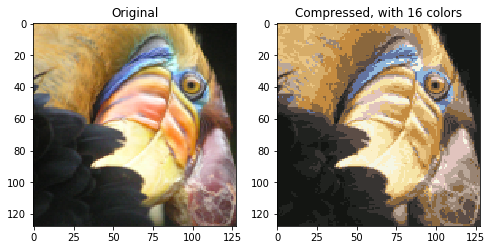

In [26]:

K = 16
max_iters = 10

# Load an image of a bird
A = mpl.image.imread(os.path.join('Data', 'bird_small.png'))


# Divide by 255 so that all values are in the range 0 - 1
A /= 255

# Reshape the image into an Nx3 matrix where N = number of pixels.
# Each row will contain the Red, Green and Blue pixel values
# This gives us our dataset matrix X that we will use K-Means on.
X = A.reshape(-1, 3)


initial_centroids = kMeansInitCentroids(X, K)

# Run K-Means
centroids, idx = runkMeans(X, initial_centroids,findClosestCentroids,computeCentroids,max_iters)

# We can now recover the image from the indices (idx) by mapping each pixel
# (specified by its index in idx) to the centroid value
# Reshape the recovered image into proper dimensions
X_recovered = centroids[idx, :].reshape(A.shape)

# Display the original image, rescale back by 255
fig, ax = pyplot.subplots(1, 2, figsize=(8, 4))
ax[0].imshow(A*255)
ax[0].set_title('Original')
ax[0].grid(False)

# Display compressed image, rescale back by 255
ax[1].imshow(X_recovered*255)
ax[1].set_title('Compressed, with %d colors' % K)
ax[1].grid(False)

The original image
required 24 bits for each one of the 128×128 pixel locations, resulting in total
size of 128 × 128 × 24 = 393, 216 bits. The new representation requires some
overhead storage in form of a dictionary of 16 colors, each of which require
24 bits, but the image itself then only requires 4 bits per pixel location. The
final number of bits used is therefore 16 × 24 + 128 × 128 × 4 = 65, 920 bits,
which corresponds to compressing the original image by about a factor of 6.

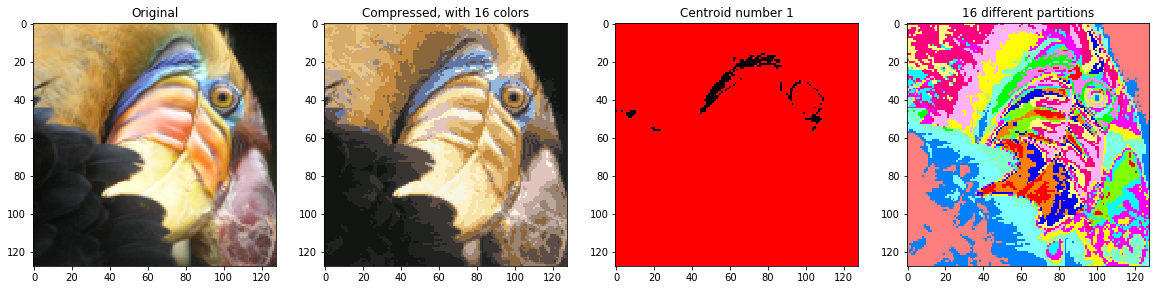

In [29]:

# Display the original image, rescale back by 255
fig, ax = pyplot.subplots(1, 4, figsize=(20, 10))
ax[0].imshow(A*255)
ax[0].set_title('Original')
ax[0].grid(False)

# Display compressed image, rescale back by 255
ax[1].imshow(X_recovered*255)
ax[1].set_title('Compressed, with %d colors' % K)
ax[1].grid(False)

centroid_num = 1
X = X_recovered.copy()
X1 = (X).reshape(-1,3)
for i in range(X1.shape[0]):
    if sum(X1[i,:] == centroids[centroid_num]) == 0:
        X1[i,:] = [1,0,0]
X1 = X1.reshape(A.shape)
ax[2].imshow(X1)
ax[2].set_title('Centroid number %d' % centroid_num)
ax[2].grid(False)

color = [[1,0,0],[0,1,0],[0,0,1],[1,1,0],[1,0,1],[0,1,1],[1,0.7,1],[1,0.5,0],[1,0,0.5],[0.5,1,0],[0,0.5,1],[1,1,0.5],[1,0.5,1],[0.5,1,1],[0.5,1,0.8],[1,0.5,0.5],]
X = X_recovered.copy()
X2 = (X).reshape(-1,3)
for i in range(X2.shape[0]):
    for k in range(K):
        if sum(X2[i,:] == centroids[k]) == 3:
            X2[i,:] = color[k]
X2 = X2.reshape(A.shape)
ax[3].imshow(X2)
ax[3].set_title('16 different partitions')
ax[3].grid(False)